In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
df = pd.read_csv('mushroom_dataset.csv', sep=None, engine='python')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# Exploratory Data Analysis

In [322]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (61069, 21). This dataset contains 61069 rows and 21 columns.


In [323]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [324]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

### Data Spliting

In [326]:
numerical_data = df.select_dtypes(include='number')

numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['cap-diameter', 'stem-height', 'stem-width']


In [327]:
categorical_data=df.select_dtypes(include= 'object')

categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 18 numerical features: 

['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


### Descriptive Analysis

Statistics of features

In [328]:
numerical_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [329]:
categorical_data.describe()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,33888,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


## Numerical Feature

Variance of each numerical features

In [330]:
numerical_data.var()

cap-diameter     27.718592
stem-height      11.357014
stem-width      100.720394
dtype: float64

Skewness of each numerical features

In [331]:
numerical_data.skew()

cap-diameter    3.822844
stem-height     2.020904
stem-width      2.164957
dtype: float64

**All Numerical features are highlt Right skewed and high variance.

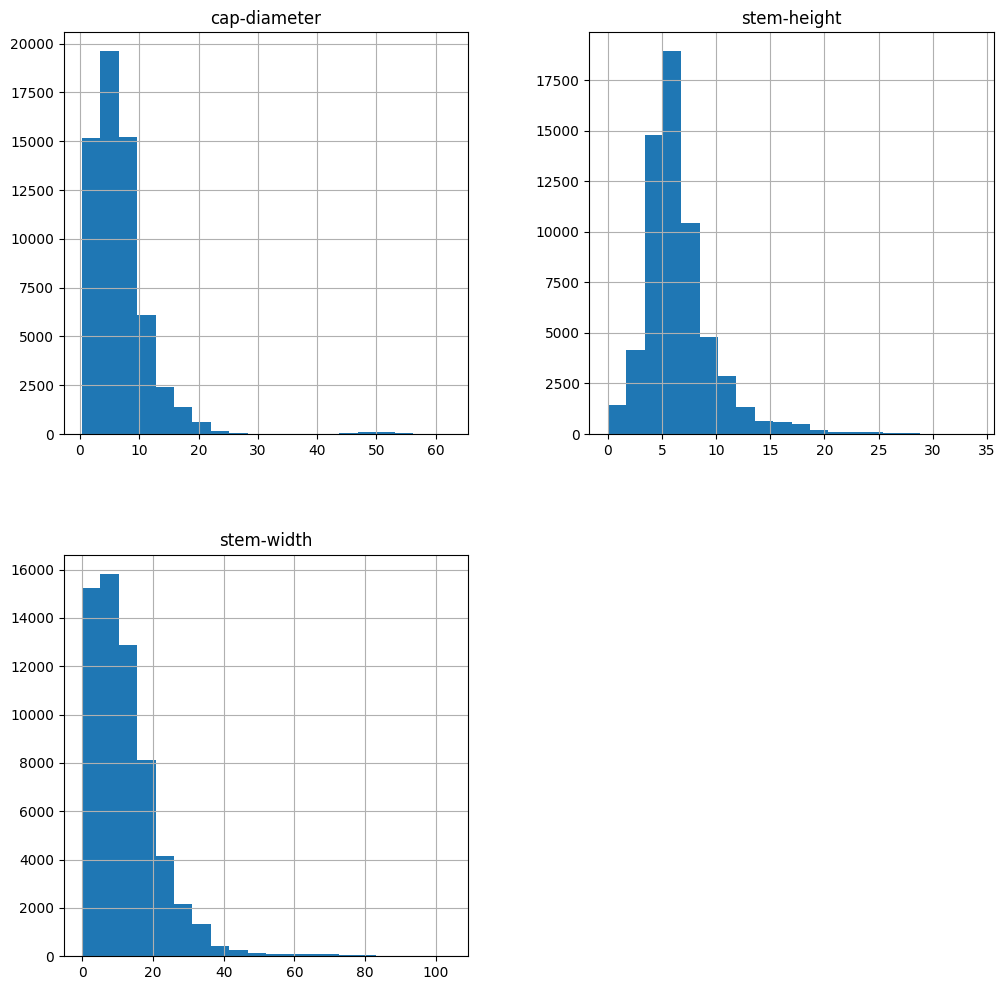

In [332]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

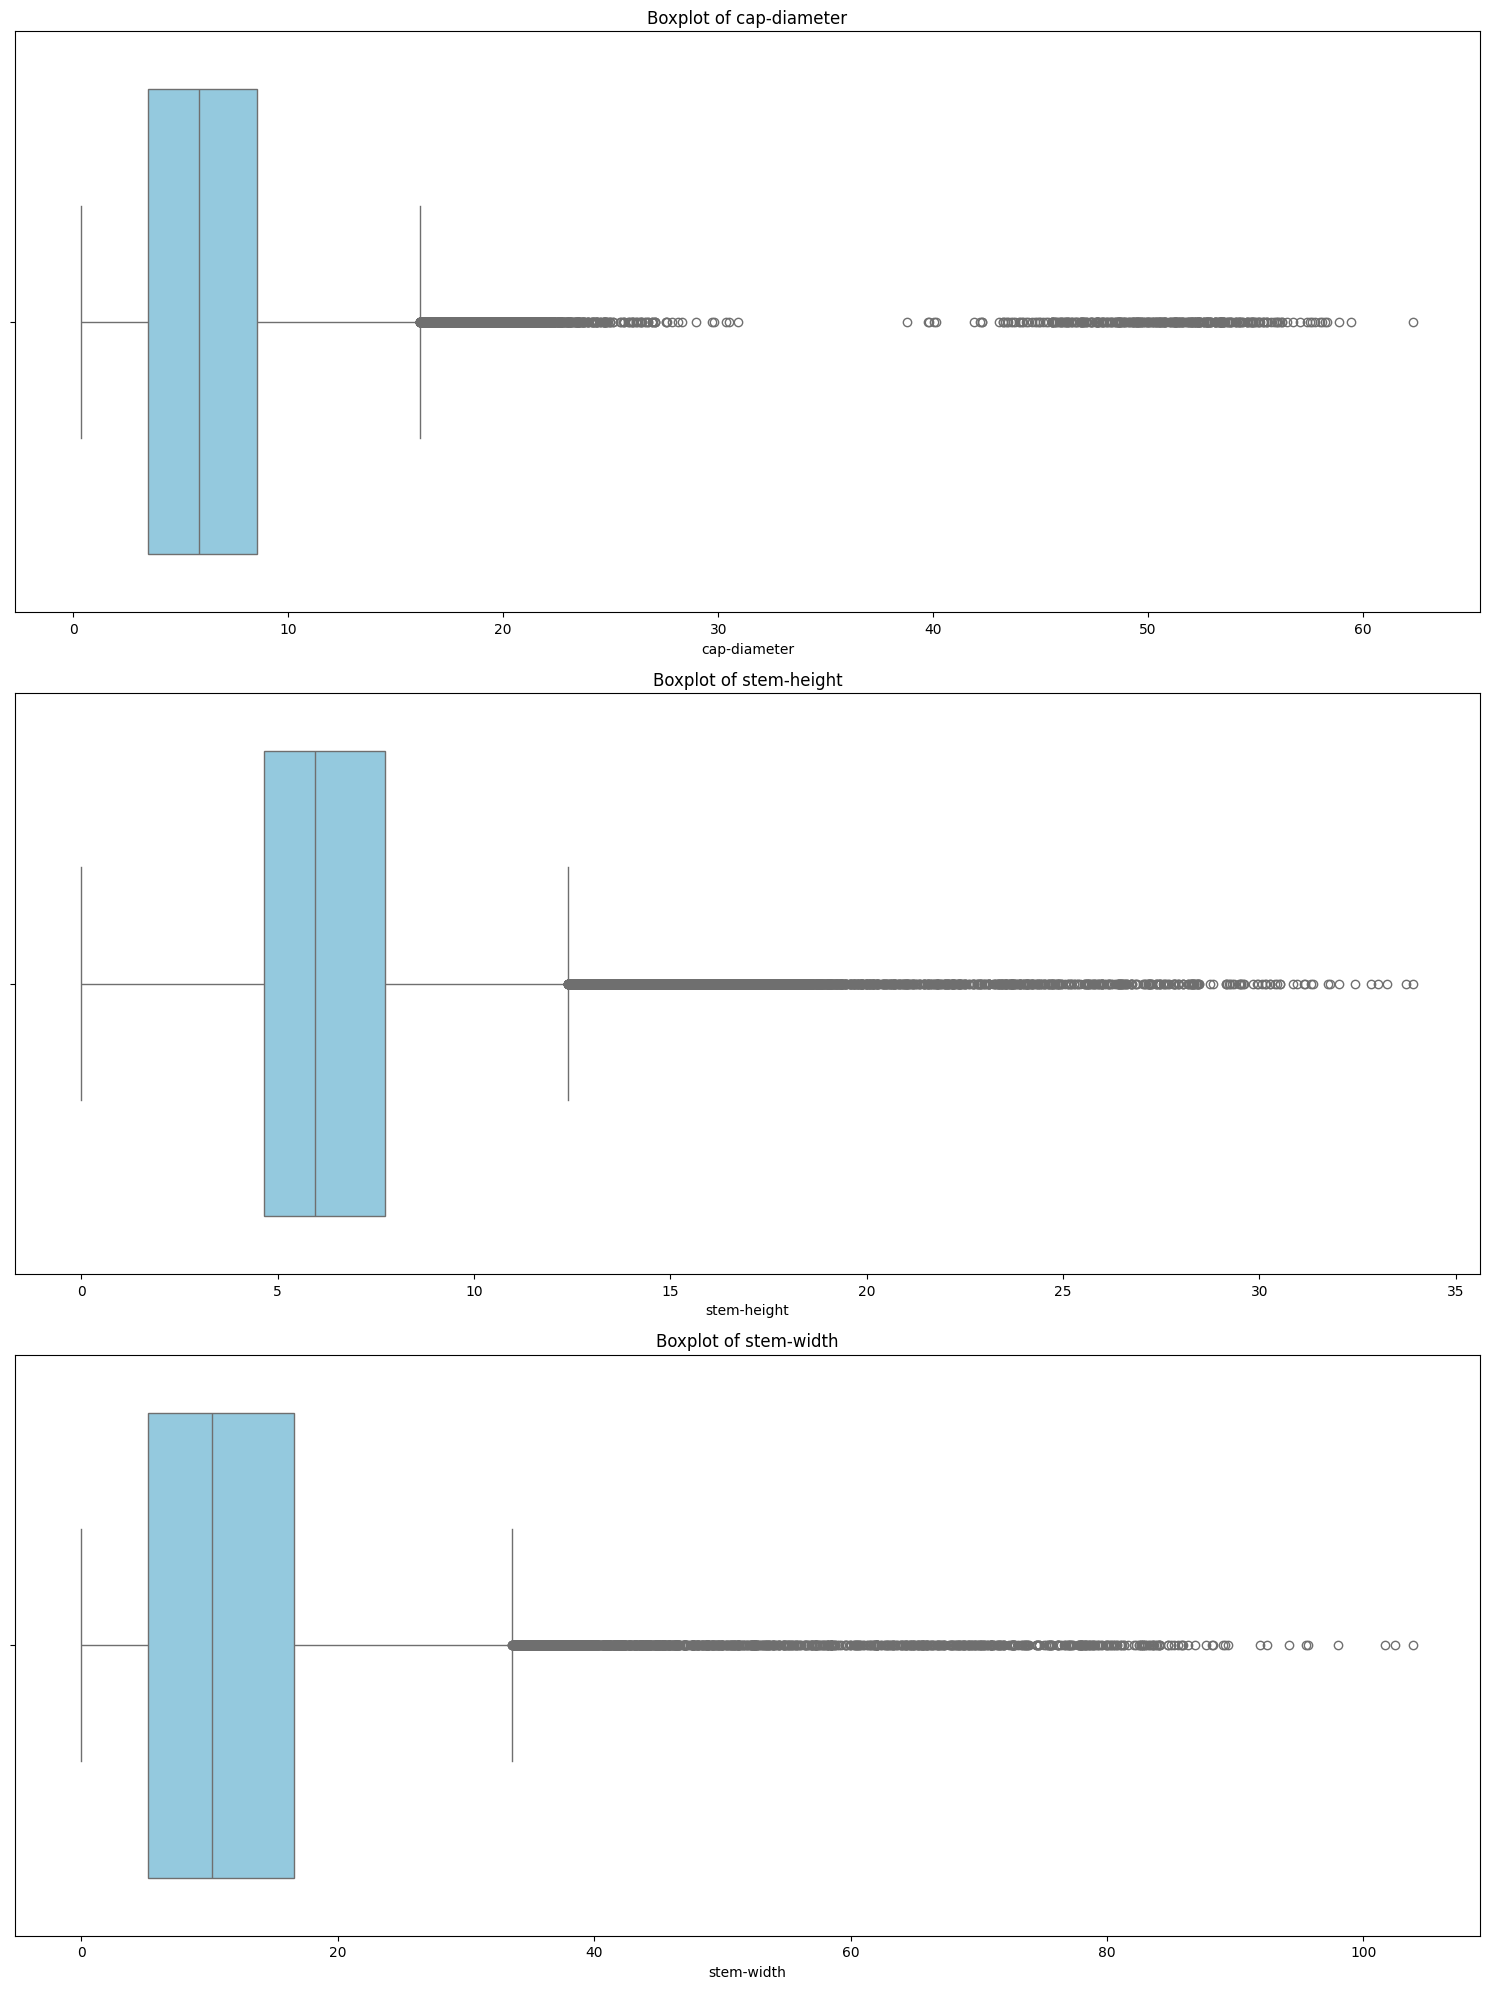

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

**Too much outliers

In [334]:
numerical_data.nunique()

cap-diameter    2571
stem-height     2226
stem-width      4630
dtype: int64

### Correlation Analysis of Numerical features

In [335]:
correlation_matrix_numeric = numerical_data.corr()
correlation_matrix_numeric

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


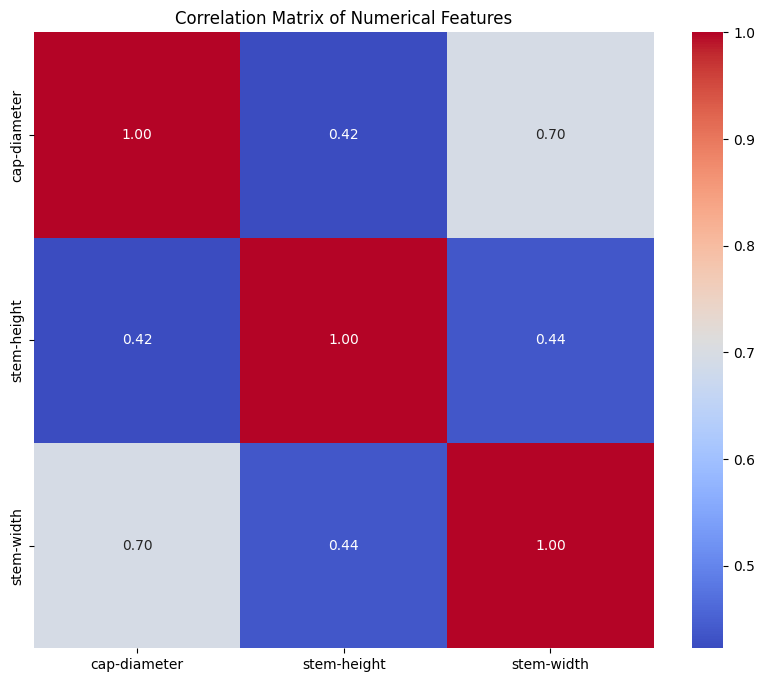

In [336]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [337]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
target= df['class']
target
target_encoded = Le.fit_transform(target)
target_encoded


target_series = pd.Series(target_encoded, name='class', index=df.index)
numerical_with_target = pd.concat([numerical_data, target_series], axis=1)

numerical_with_target.head()

,cap-diameter,stem-height,stem-width,class
0,15.26,16.95,17.09,1
1,16.60,17.99,18.19,1
2,14.07,17.80,17.74,1
3,14.17,15.77,15.98,1
4,14.64,16.53,17.20,1


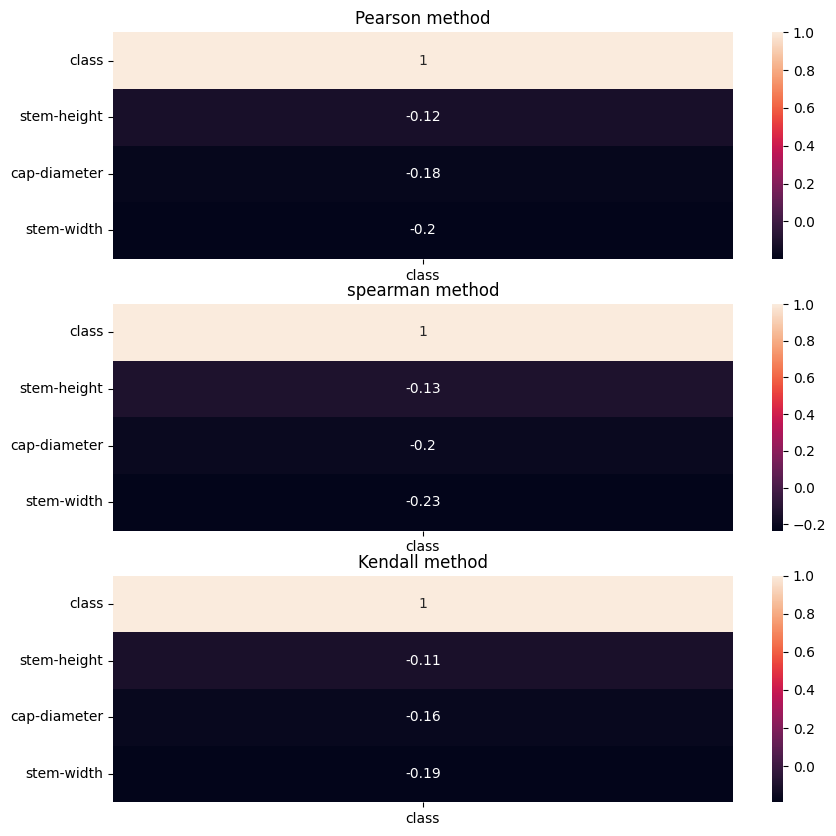

In [338]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_with_target.corr('pearson')[['class']].sort_values(by='class', ascending=False)
corr2 = numerical_with_target.corr('spearman')[['class']].sort_values(by='class', ascending=False)
corr3 = numerical_with_target.corr('kendall')[['class']].sort_values(by='class', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

## Catagorical Features

In [339]:
unique_counts=categorical_data.nunique()
print(unique_counts)

class                    2
cap-shape                7
cap-surface             11
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-spacing             3
gill-color              12
stem-root                5
stem-surface             8
stem-color              13
veil-type                1
veil-color               6
has-ring                 2
ring-type                8
spore-print-color        7
habitat                  8
season                   4
dtype: int64


** 1 unique value in veil-type that makes the column redundent

In [340]:
df.drop(columns=['veil-type'],inplace=True)

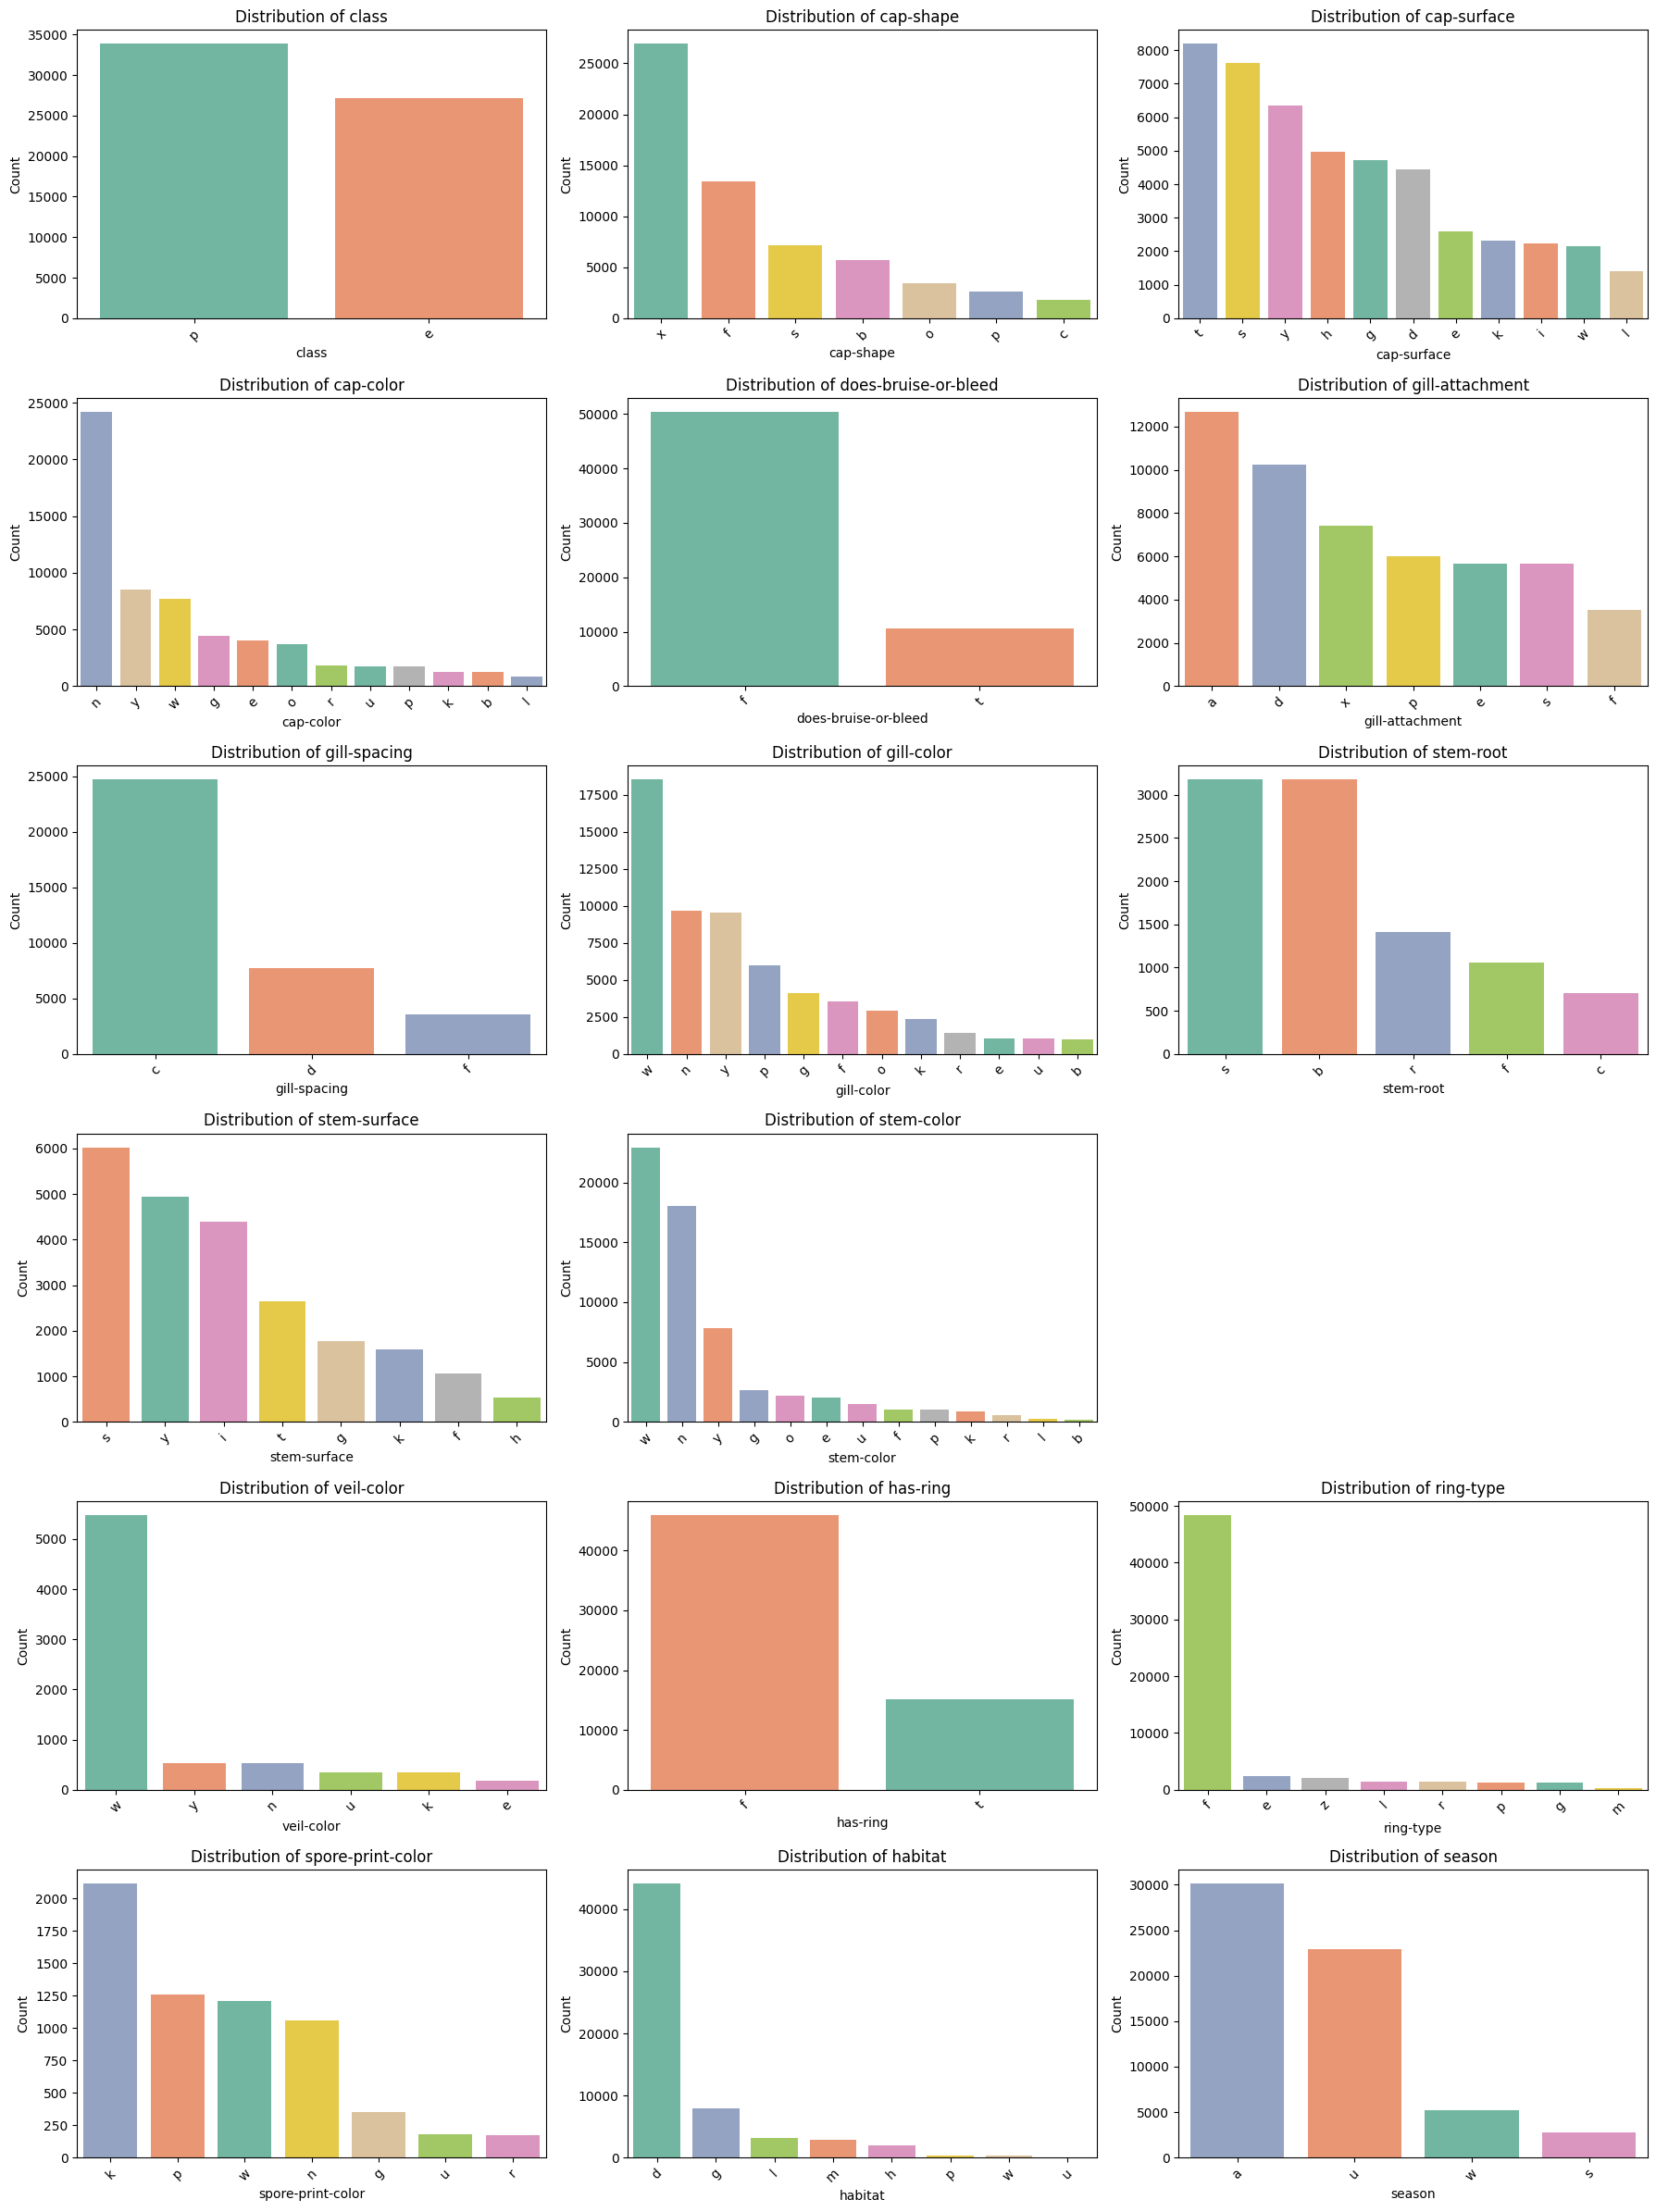

In [341]:
import math
num_features = len(categorical_features)
n_cols = 3
n_rows = math.ceil(num_features / n_cols)
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_features, 1):
    if col in df.columns:
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2', hue=col, legend=False)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**No significant Data Imbalance In class column. But there are high imbalance on some features.

# Feature selection and handaling null values

In [342]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [343]:
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio >= 0.4].index

print("Dropped columns due to ≥40% missing values:")
for col in cols_to_drop:
    print(f"- {col}")

df = df.drop(columns=cols_to_drop)
df.shape

Dropped columns due to ≥40% missing values:
- gill-spacing
- stem-root
- stem-surface
- veil-color
- spore-print-color


(61069, 15)

**Columns with more than 40% missing values were removed to reduce noise and improve model reliability while preserving informative features.

In [344]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [345]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

***Imputing Missing Values in cap-surface, gill-attachment, ring-type

In [346]:
cap_surface_mode = df['cap-surface'].mode()[0]
df['cap-surface'].fillna(cap_surface_mode, inplace=True)
print(f"Imputed missing values in 'cap-surface' with mode: {cap_surface_mode}")
print(df['cap-surface'].isnull().sum()) 

Imputed missing values in 'cap-surface' with mode: t
0


C:\Users\Niloy\AppData\Local\Temp\ipykernel_18820\588445692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cap-surface'].fillna(cap_surface_mode, inplace=True)


In [347]:
gill_attachment_mode = df['gill-attachment'].mode()[0]
df['gill-attachment'].fillna(gill_attachment_mode, inplace=True)
print(f"Imputed missing values in 'gill-attachment' with mode: {gill_attachment_mode}")
print(df['gill-attachment'].isnull().sum())

Imputed missing values in 'gill-attachment' with mode: a
0


C:\Users\Niloy\AppData\Local\Temp\ipykernel_18820\486152420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gill-attachment'].fillna(gill_attachment_mode, inplace=True)


In [348]:
ring_type_mode = df['ring-type'].mode()[0]
df['ring-type'].fillna(ring_type_mode, inplace=True)
print(f"Imputed missing values in 'ring-type' with mode: {ring_type_mode}")
print(df['ring-type'].isnull().sum())

Imputed missing values in 'ring-type' with mode: f
0


C:\Users\Niloy\AppData\Local\Temp\ipykernel_18820\3352412353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ring-type'].fillna(ring_type_mode, inplace=True)


In [349]:
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

*** Treating High Skewness and High Variance in Numerical Features

In [350]:
# Identify highly skewed and high variance numerical features
skewness = numerical_data.skew()
variance = numerical_data.var()
high_skew = skewness[abs(skewness) > 1].index.tolist()
high_var = variance[variance > 1].index.tolist()
print('Highly skewed features:', high_skew)
print('High variance features:', high_var)

# Treat with log1p transformation (log(1+x))
for col in set(high_skew + high_var):
    numerical_data[col + '_log'] = np.log1p(numerical_data[col])
    df[col + '_log'] = np.log1p(df[col])
    print(f'Transformed {col} with log1p')

# Check new skewness and variance
print('New skewness:')
print(numerical_data[[c + '_log' for c in set(high_skew + high_var)]].skew())
print('New variance:')
print(numerical_data[[c + '_log' for c in set(high_skew + high_var)]].var())

Highly skewed features: ['cap-diameter', 'stem-height', 'stem-width']
High variance features: ['cap-diameter', 'stem-height', 'stem-width']
Transformed stem-height with log1p
Transformed cap-diameter with log1p
Transformed stem-width with log1p
New skewness:
stem-height_log    -1.024134
cap-diameter_log   -0.038218
stem-width_log     -0.486602
dtype: float64
New variance:
stem-height_log     0.198712
cap-diameter_log    0.335231
stem-width_log      0.633172
dtype: float64


In [351]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,stem-height_log,cap-diameter_log,stem-width_log
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w,2.887590,2.788708,2.895359
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u,2.943913,2.867899,2.954389
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w,2.933857,2.712706,2.930660
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w,2.819592,2.719320,2.832036
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w,2.863914,2.749832,2.901422


In [352]:
df.drop(columns=numerical_features, inplace=True)

In [353]:
# Remove outliers from all numerical columns using the IQR method

numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = len(df)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = len(df)
    print(f"Removed {before - after} outliers from '{col}'")

print("Shape after outlier removal:", df.shape)

Removed 3095 outliers from 'stem-height_log'
Removed 361 outliers from 'cap-diameter_log'
Removed 11 outliers from 'stem-width_log'
Shape after outlier removal: (57602, 15)


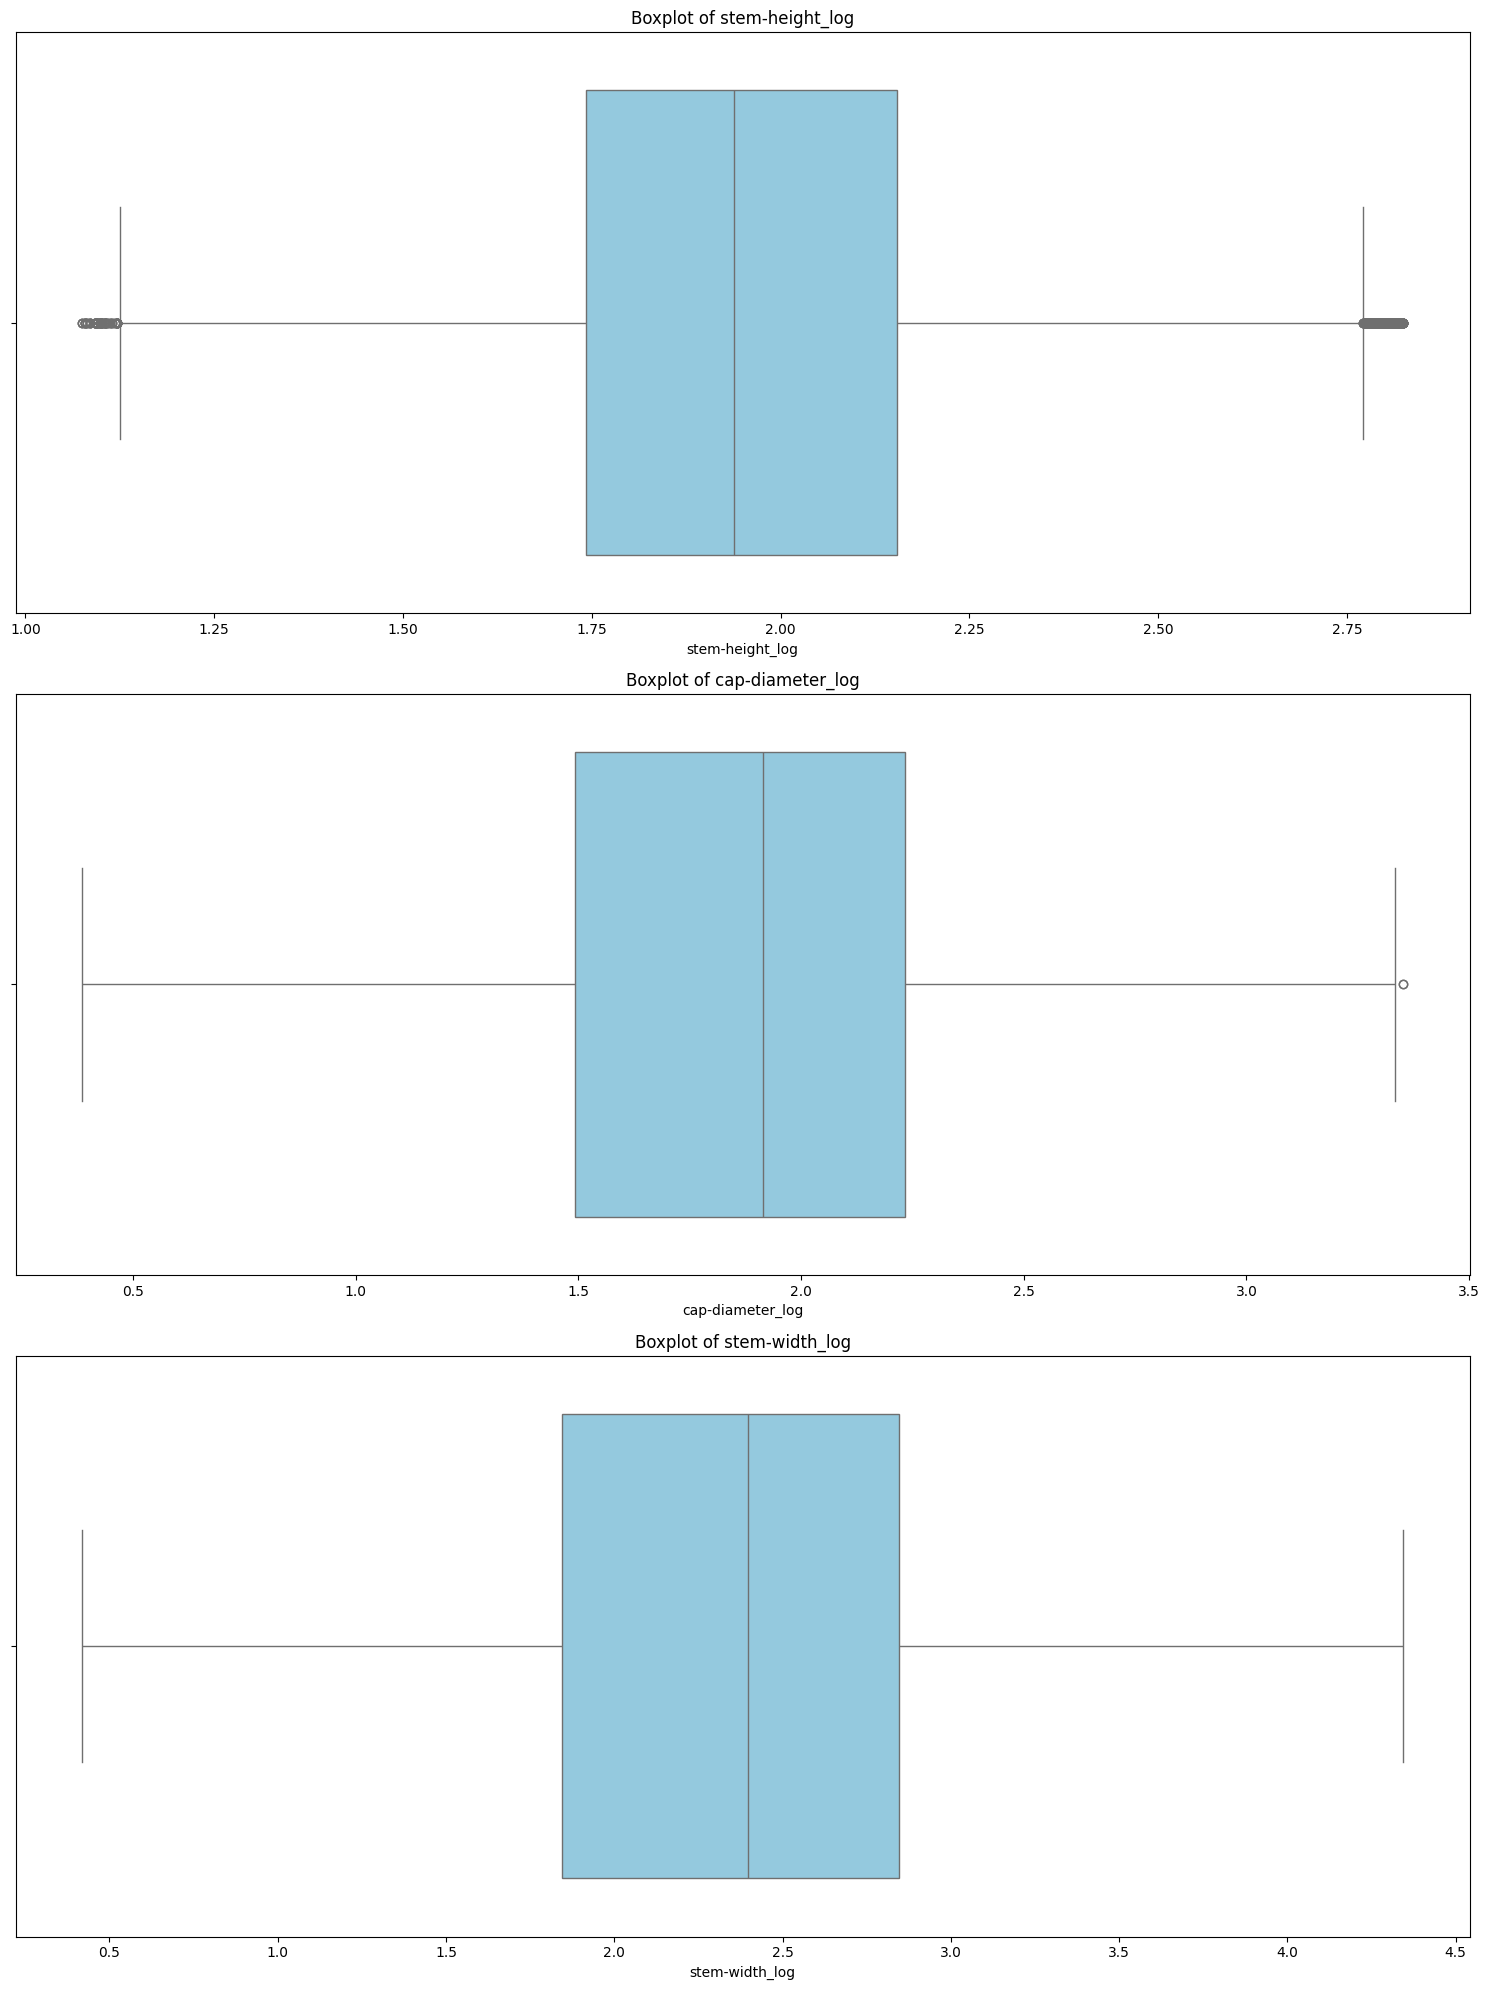

In [354]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [355]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print('Updated categorical features:', categorical_features)

Updated categorical features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [356]:
# Group rare categories in categorical features into 'Other' if they are <5% of total samples
threshold = 0.05 * len(df)
for col in categorical_features:
    if col in df.columns:
        value_counts = df[col].value_counts()
        rare = value_counts[value_counts < threshold].index
        if len(rare) > 0:
            df[col] = df[col].replace(rare, 'Other')
            print(f"Grouped rare categories in '{col}' into 'Other': {list(rare)}")
        else:
            print(f"No rare categories in '{col}'")
    else:
        print(f"Column '{col}' not found in df, skipping.")

for col in categorical_features:
    if col in df.columns:
        print(f"\n{col} value counts after grouping:")
        print(df[col].value_counts())

No rare categories in 'class'
Grouped rare categories in 'cap-shape' into 'Other': ['p', 'c', 'o']
Grouped rare categories in 'cap-surface' into 'Other': ['e', 'i', 'k', 'w', 'l']
Grouped rare categories in 'cap-color' into 'Other': ['u', 'p', 'r', 'k', 'b', 'l']
No rare categories in 'does-bruise-or-bleed'
Grouped rare categories in 'gill-attachment' into 'Other': ['f']
Grouped rare categories in 'gill-color' into 'Other': ['f', 'o', 'k', 'r', 'e', 'u', 'b']
Grouped rare categories in 'stem-color' into 'Other': ['g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b']
No rare categories in 'has-ring'
Grouped rare categories in 'ring-type' into 'Other': ['e', 'z', 'l', 'r', 'p', 'g']
Grouped rare categories in 'habitat' into 'Other': ['m', 'h', 'p', 'w', 'u']
Grouped rare categories in 'season' into 'Other': ['s']

class value counts after grouping:
class
p    31810
e    25792
Name: count, dtype: int64

cap-shape value counts after grouping:
cap-shape
x        26392
f        12871
s         7163
b

In [357]:
# Change rows in 'season' with 'Other' back to 's'. because only 's' is catogoriged to 'other'
df.loc[df['season'] == 'Other', 'season'] = 's'
print(df['season'].value_counts())

season
a    28912
u    21684
w     4691
s     2315
Name: count, dtype: int64


In [358]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,stem-height_log,cap-diameter_log,stem-width_log
3,p,f,h,e,f,e,w,w,t,Other,d,w,2.819592,2.719320,2.832036
67,p,f,g,o,f,e,w,w,t,Other,d,w,2.819592,2.776332,2.839078
83,p,f,g,o,f,e,w,w,t,Other,d,w,2.788708,2.718660,2.844328
123,p,x,h,o,f,e,w,w,t,Other,d,w,2.816606,2.643334,2.844328
190,p,x,h,e,f,e,w,w,t,Other,d,a,2.803966,2.674149,2.783158


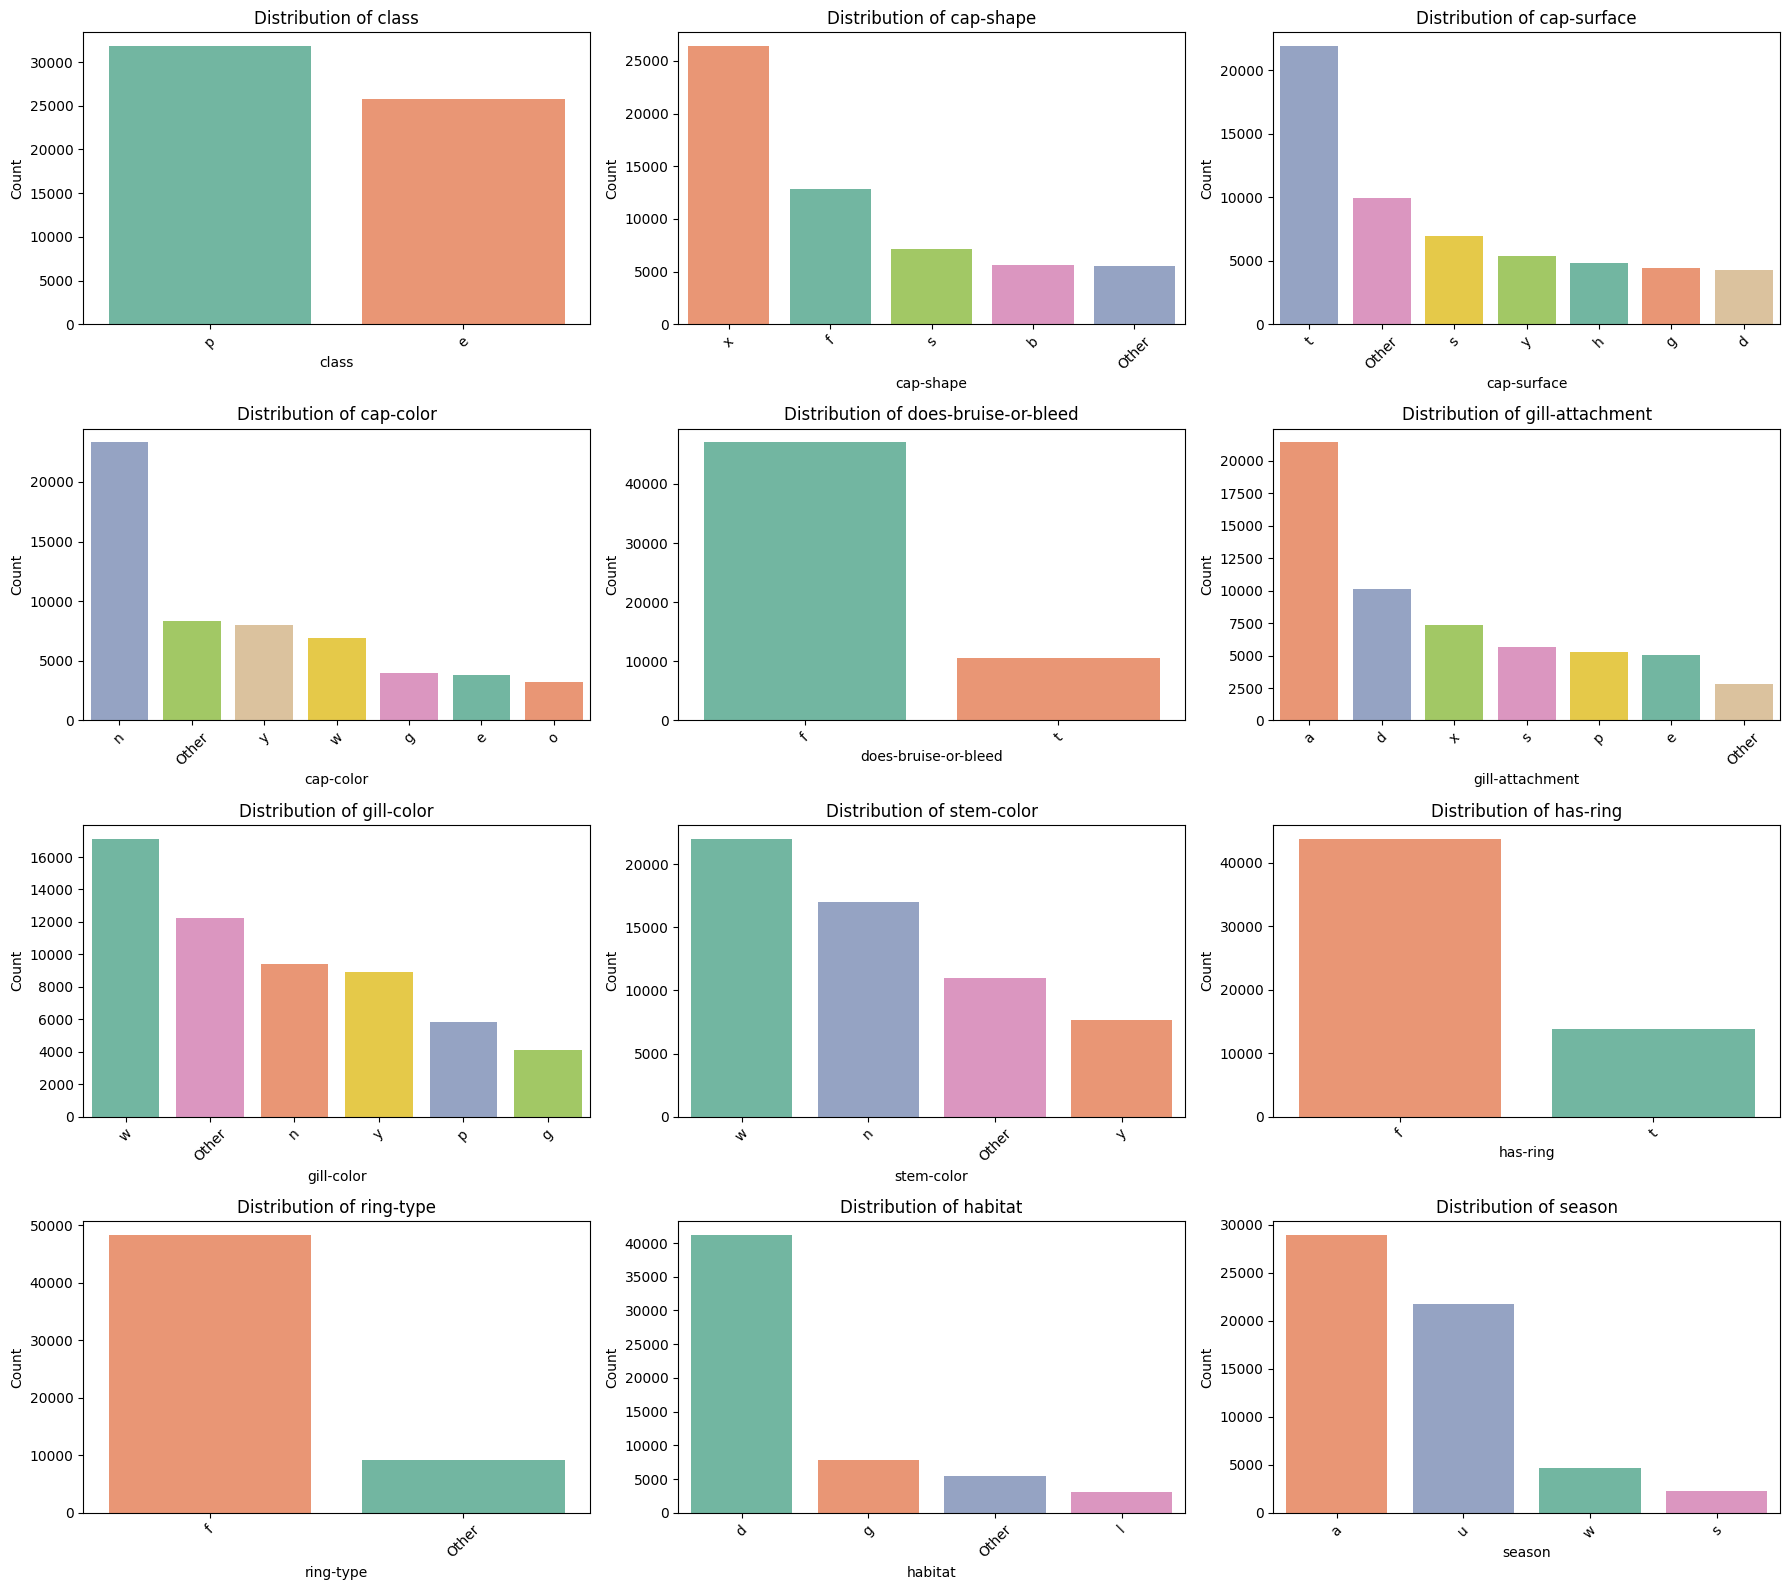

In [359]:
import math
num_features = len(categorical_features)
n_cols = 3
n_rows = math.ceil(num_features / n_cols)
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_features, 1):
    if col in df.columns:
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2', hue=col, legend=False)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [360]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,stem-height_log,cap-diameter_log,stem-width_log
3,p,f,h,e,f,e,w,w,t,Other,d,w,2.819592,2.719320,2.832036
67,p,f,g,o,f,e,w,w,t,Other,d,w,2.819592,2.776332,2.839078
83,p,f,g,o,f,e,w,w,t,Other,d,w,2.788708,2.718660,2.844328
123,p,x,h,o,f,e,w,w,t,Other,d,w,2.816606,2.643334,2.844328
190,p,x,h,e,f,e,w,w,t,Other,d,a,2.803966,2.674149,2.783158


# prepareing data for model training (Scaling, Encoding, Spliting)

In [361]:
from sklearn.preprocessing import StandardScaler

# Select only the log-transformed numerical columns
log_num_cols = [col for col in df.columns if col.endswith('_log')]
scaler = StandardScaler()
df[log_num_cols] = scaler.fit_transform(df[log_num_cols])

In [362]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,stem-height_log,cap-diameter_log,stem-width_log
3,p,f,h,e,f,e,w,w,t,Other,d,w,2.741435,1.590619,0.719437
67,p,f,g,o,f,e,w,w,t,Other,d,w,2.741435,1.694640,0.729102
83,p,f,g,o,f,e,w,w,t,Other,d,w,2.644136,1.589416,0.736305
123,p,x,h,o,f,e,w,w,t,Other,d,w,2.732028,1.451979,0.736305
190,p,x,h,e,f,e,w,w,t,Other,d,a,2.692207,1.508202,0.652360


In [363]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
# Prepare features (X) and target (y)
X = df.drop(columns=['class'])
Y = df['class']
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Apply OneHotEncoder to X only if there are categorical columns
if categorical_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    encoded_array = ohe.fit_transform(X[categorical_cols])
    encoded_cols = ohe.get_feature_names_out(categorical_cols)
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=X.index)
    X = X.drop(columns=categorical_cols)
    X = pd.concat([X, encoded_df], axis=1)

X.head()

,stem-height_log,cap-diameter_log,stem-width_log,cap-shape_b,cap-shape_f,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_g,cap-surface_h,...,stem-color_w,stem-color_y,has-ring_t,ring-type_f,habitat_d,habitat_g,habitat_l,season_s,season_u,season_w
3,2.741435,1.590619,0.719437,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
67,2.741435,1.694640,0.729102,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
83,2.644136,1.589416,0.736305,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
123,2.732028,1.451979,0.736305,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
190,2.692207,1.508202,0.652360,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [364]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['class'])

In [365]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [366]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46081, 42), (11521, 42), (46081,), (11521,))

# Supervised Model Training and Testing

In [367]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
k_neighbors_model = KNeighborsClassifier(n_neighbors=25)
k_neighbors_model.fit(x_train, y_train)

y_pred_knn = k_neighbors_model.predict(x_test)

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5159
           1       1.00      1.00      1.00      6362

    accuracy                           1.00     11521
   macro avg       1.00      1.00      1.00     11521
weighted avg       1.00      1.00      1.00     11521

Confusion Matrix:
[[5129   30]
 [  10 6352]]


In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate models with random_state for reproducibility
logistic_model = LogisticRegression(random_state=42)
svc_model = SVC(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
k_neighbors_model = KNeighborsClassifier(n_neighbors=25)
g_naive_bayes_model = GaussianNB()
b_naive_bayes_model = BernoulliNB()
xg_model = XGBClassifier(random_state=42)

# Train models for Class Prediction
print("Training models for Class Prediction...")
logistic_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)
k_neighbors_model.fit(x_train, y_train)
g_naive_bayes_model.fit(x_train, y_train)
b_naive_bayes_model.fit(x_train, y_train)
xg_model.fit(x_train, y_train)
print("Training complete for Class Prediction")

# Make predictions on the test sets
y_pred_lr = logistic_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)
y_pred_dt = decision_tree_model.predict(x_test)
y_pred_rf = random_forest_model.predict(x_test)
y_pred_knn = k_neighbors_model.predict(x_test)
y_pred_gnb = g_naive_bayes_model.predict(x_test)
y_pred_bnb = b_naive_bayes_model.predict(x_test)

# Evaluate and print results for Diabetes
print("\nEvaluation for Class Prediction:")
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")

print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nGaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

print("\nBernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

print("\nXGBoost Classifier:")
y_pred_xg = xg_model.predict(x_test)
print(classification_report(y_test, y_pred_xg))

Training models for Class Prediction...
Training complete for Class Prediction

Evaluation for Class Prediction:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      5159
           1       0.72      0.76      0.74      6362

    accuracy                           0.71     11521
   macro avg       0.70      0.70      0.70     11521
weighted avg       0.71      0.71      0.71     11521

Confusion Matrix:
[[3288 1871]
 [1513 4849]]

Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5159
           1       1.00      1.00      1.00      6362

    accuracy                           1.00     11521
   macro avg       1.00      1.00      1.00     11521
weighted avg       1.00      1.00      1.00     11521

Confusion Matrix:

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      515

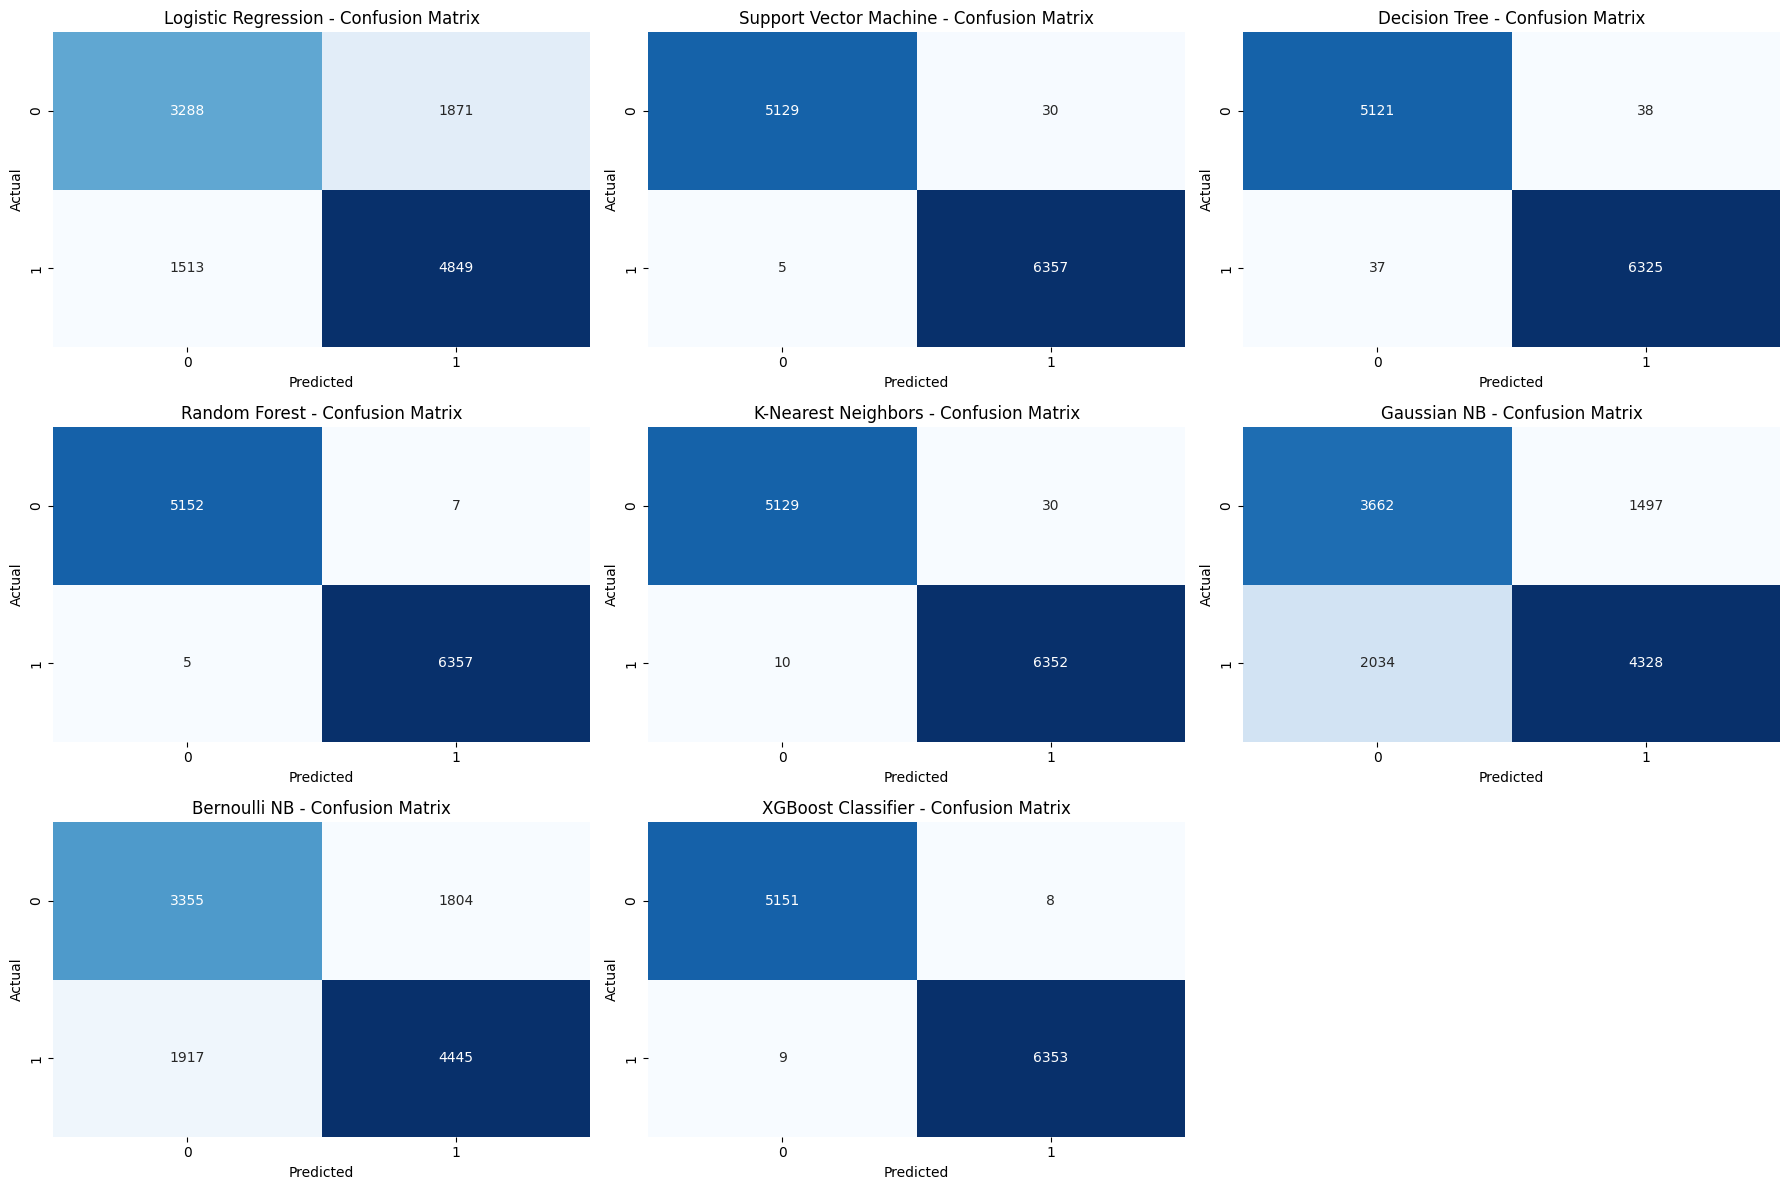

In [ ]:
# Visualize Confusion Matrices for Models in a Grid (3 columns per row)
conf_matrices = [
    (confusion_matrix(y_test, y_pred_lr), 'Logistic Regression'),
    (confusion_matrix(y_test, y_pred_svc), 'Support Vector Machine'),
    (confusion_matrix(y_test, y_pred_dt), 'Decision Tree'),
    (confusion_matrix(y_test, y_pred_rf), 'Random Forest'),
    (confusion_matrix(y_test, y_pred_knn), 'K-Nearest Neighbors'),
    (confusion_matrix(y_test, y_pred_gnb), 'Gaussian NB'),
    (confusion_matrix(y_test, y_pred_bnb), 'Bernoulli NB'),
    (confusion_matrix(y_test, y_pred_xg), 'XGBoost Classifier')
 ]

n_cols = 3
n_rows = math.ceil(len(conf_matrices) / n_cols)
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, (cm, title) in enumerate(conf_matrices, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

ROC Curve and AUC for Models:


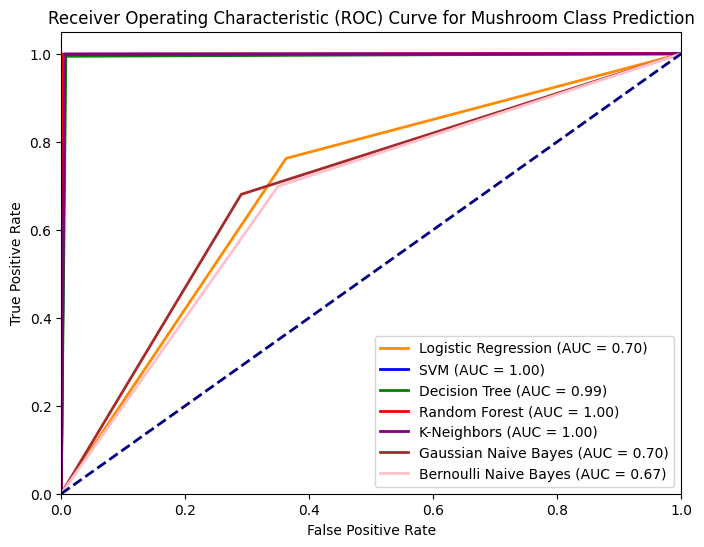

In [370]:
from sklearn.metrics import roc_curve, auc

# Calculate and plot ROC curve and AUC for models
print("ROC Curve and AUC for Models:")

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)
auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label=f'SVM (AUC = {auc_svc:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Random Forest - Diabetes
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')

# K-Nearest Neighbors - Diabetes
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label=f'K-Neighbors (AUC = {auc_knn:.2f})')

# Gaussian Naive Bayes - Diabetes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, color='brown', lw=2, label=f'Gaussian Naive Bayes (AUC = {auc_gnb:.2f})')

# Bernoulli Naive Bayes - Diabetes
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_pred_bnb)
auc_bnb = auc(fpr_bnb, tpr_bnb)
plt.plot(fpr_bnb, tpr_bnb, color='pink', lw=2, label=f'Bernoulli Naive Bayes (AUC = {auc_bnb:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Mushroom Class Prediction')
plt.legend(loc="lower right")
plt.show()

## Neural Network

Training features shape: (46081, 42)
Test features shape: (11521, 42)
Training target distribution: [20633 25448]
Test target distribution: [5159 6362]
Epoch 1/30
1152/1152 - 2s - 2ms/step - accuracy: 0.8087 - loss: 0.3956 - val_accuracy: 0.9618 - val_loss: 0.1358
Epoch 2/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9469 - loss: 0.1436 - val_accuracy: 0.9857 - val_loss: 0.0520
Epoch 3/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9704 - loss: 0.0824 - val_accuracy: 0.9923 - val_loss: 0.0294
Epoch 4/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9780 - loss: 0.0602 - val_accuracy: 0.9944 - val_loss: 0.0201
Epoch 5/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9834 - loss: 0.0463 - val_accuracy: 0.9951 - val_loss: 0.0152
Epoch 6/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9861 - loss: 0.0382 - val_accuracy: 0.9960 - val_loss: 0.0122
Epoch 7/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9872 - loss: 0.0357 - val_accuracy: 0.9949 - val_loss: 0.0131
Epoch 8/30
1152/1152 - 1s - 1ms/step - accuracy: 0.9889 -

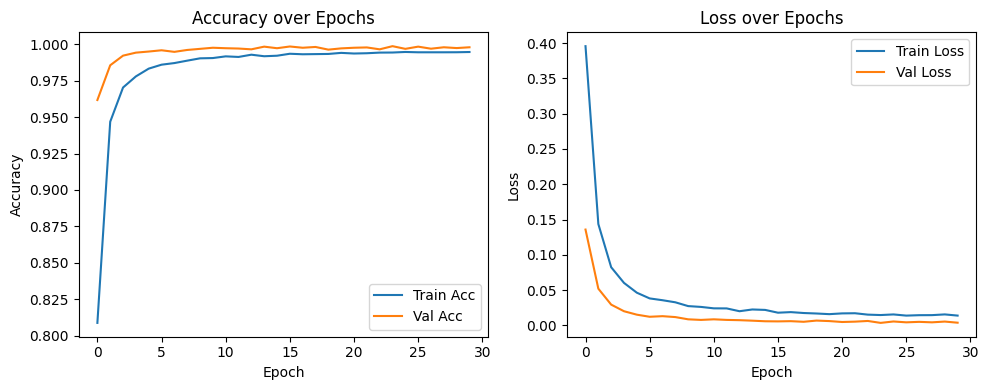

In [371]:
# Neural Network with TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"Training features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adam optimizer is robust and widely used.
# Binary crossentropy is suitable for binary classification.

history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)


# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


### Neural Network Tuning
The initial neural network achieved very high accuracy, but let's try to further tune the model by:
- Adding early stopping to prevent overfitting
- Trying a deeper architecture
- Adjusting dropout rates
- Using learning rate reduction on plateau

Epoch 1/50
1152/1152 - 2s - 2ms/step - accuracy: 0.8442 - loss: 0.3281 - val_accuracy: 0.9819 - val_loss: 0.0582 - learning_rate: 1.0000e-03
Epoch 2/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9705 - loss: 0.0824 - val_accuracy: 0.9934 - val_loss: 0.0211 - learning_rate: 1.0000e-03
Epoch 3/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9831 - loss: 0.0467 - val_accuracy: 0.9962 - val_loss: 0.0116 - learning_rate: 1.0000e-03
Epoch 4/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9878 - loss: 0.0359 - val_accuracy: 0.9956 - val_loss: 0.0128 - learning_rate: 1.0000e-03
Epoch 5/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9890 - loss: 0.0304 - val_accuracy: 0.9965 - val_loss: 0.0092 - learning_rate: 1.0000e-03
Epoch 6/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9905 - loss: 0.0267 - val_accuracy: 0.9946 - val_loss: 0.0134 - learning_rate: 1.0000e-03
Epoch 7/50
1152/1152 - 1s - 1ms/step - accuracy: 0.9918 - loss: 0.0228 - val_accuracy: 0.9976 - val_loss: 0.0063 - learning_rate: 1.0000e-03
Epoch 8/50
11

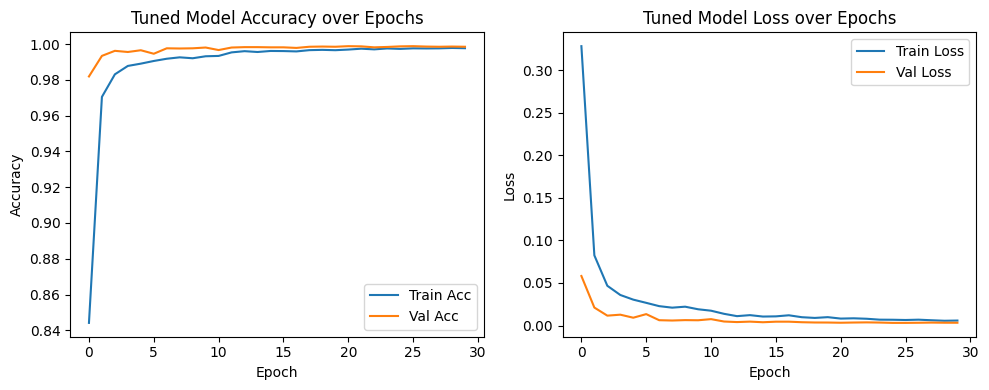

In [372]:
# Tuned Neural Network with Callbacks and Deeper Architecture

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_tuned = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model_tuned.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)
]

history_tuned = model_tuned.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=2
)

loss_tuned, acc_tuned = model_tuned.evaluate(x_test, y_test, verbose=0)
print(f"Tuned Model Test Accuracy: {acc_tuned:.4f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_tuned.history['accuracy'], label='Train Acc')
plt.plot(history_tuned.history['val_accuracy'], label='Val Acc')
plt.title('Tuned Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Val Loss')
plt.title('Tuned Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


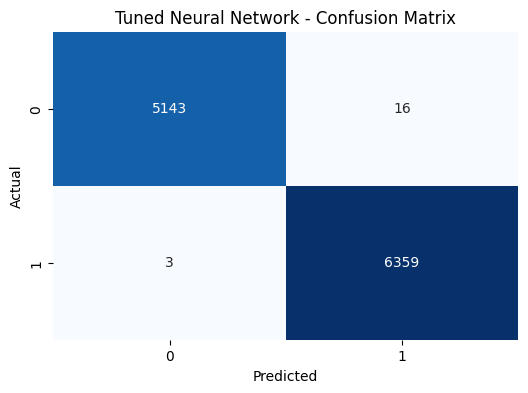

In [373]:
# Confusion Matrix for Tuned Neural Network
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

y_pred_nn = (model_tuned.predict(x_test) > 0.5).astype(int).flatten()

cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


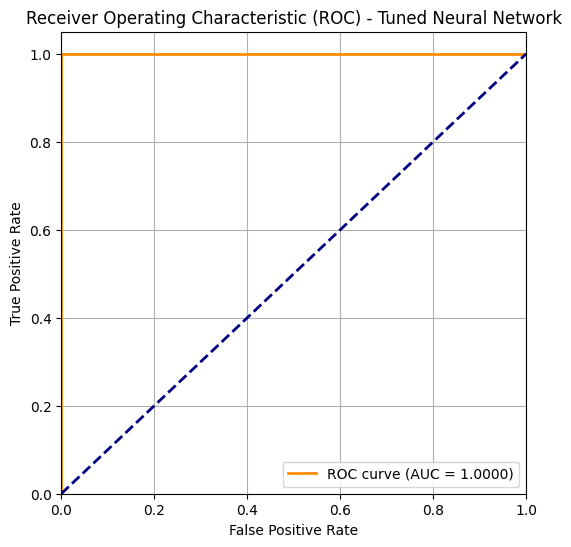

In [374]:
# ROC Curve and AUC for Tuned Neural Network
from sklearn.metrics import roc_curve, auc

probs = model_tuned.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Tuned Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

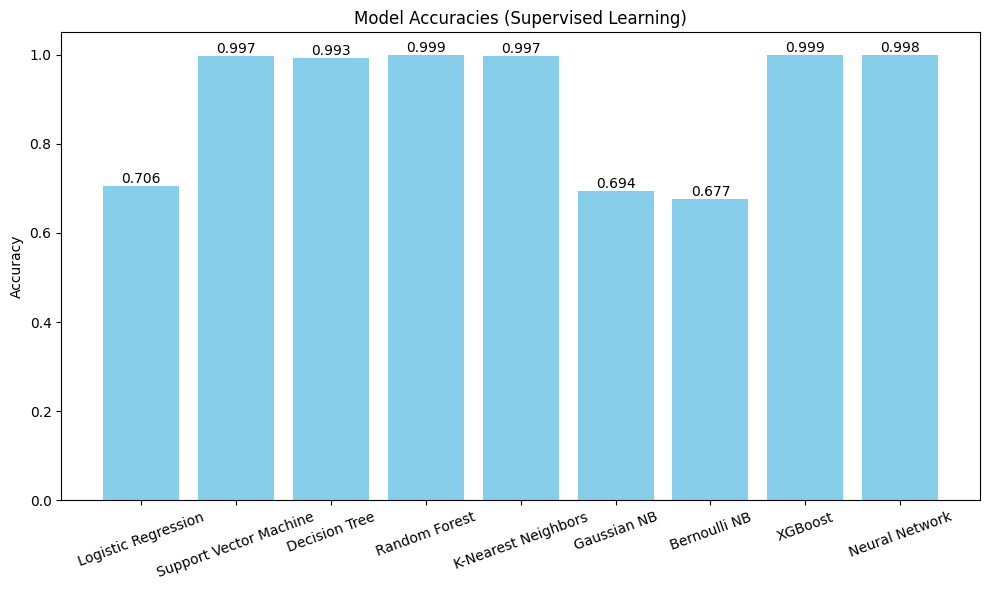

In [375]:
# Bar Chart for Model Accuracies (Supervised Learning)
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    'Logistic Regression',
    'Support Vector Machine',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Gaussian NB',
    'Bernoulli NB',
    'XGBoost',
    'Neural Network'
 ]

accuracies = [
    logistic_model.score(x_test, y_test),
    svc_model.score(x_test, y_test),
    decision_tree_model.score(x_test, y_test),
    random_forest_model.score(x_test, y_test),
    k_neighbors_model.score(x_test, y_test),
    g_naive_bayes_model.score(x_test, y_test),
    b_naive_bayes_model.score(x_test, y_test),
    xg_model.score(x_test, y_test),
    acc_tuned
 ]

if len(model_names) != len(accuracies):
    print(f"Length mismatch: {len(model_names)} model names, {len(accuracies)} accuracies. Truncating to shortest length.")
    min_len = min(len(model_names), len(accuracies))
    model_names = model_names[:min_len]
    accuracies = accuracies[:min_len]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.0, 1.05)
plt.ylabel('Accuracy')
plt.title('Model Accuracies (Supervised Learning)')
plt.xticks(rotation=20)
plt.bar_label(bars, fmt='%.3f')
plt.tight_layout()
plt.show()

# Unsupervised Learning

In [376]:
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,stem-height_log,cap-diameter_log,stem-width_log
3,p,f,h,e,f,e,w,w,t,Other,d,w,2.741435,1.590619,0.719437
67,p,f,g,o,f,e,w,w,t,Other,d,w,2.741435,1.694640,0.729102
83,p,f,g,o,f,e,w,w,t,Other,d,w,2.644136,1.589416,0.736305
123,p,x,h,o,f,e,w,w,t,Other,d,w,2.732028,1.451979,0.736305
190,p,x,h,e,f,e,w,w,t,Other,d,a,2.692207,1.508202,0.652360


In [380]:
# One-hot encode categorical features and drop unnecessary columns
from sklearn.preprocessing import OneHotEncoder

# Specify columns to drop (customize as needed)
columns_to_drop = ['Group_cluster'] if 'Group_cluster' in df.columns else []

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
df_encoded = df_encoded.drop(columns=columns_to_drop)

df = df_encoded  # Overwrite df with the encoded version

df.head()

,stem-height_log,cap-diameter_log,stem-width_log,class_p,cap-shape_b,cap-shape_f,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_g,...,stem-color_w,stem-color_y,has-ring_t,ring-type_f,habitat_d,habitat_g,habitat_l,season_s,season_u,season_w
3,2.741435,1.590619,0.719437,True,False,True,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
67,2.741435,1.694640,0.729102,True,False,True,False,False,False,True,...,True,False,True,False,True,False,False,False,False,True
83,2.644136,1.589416,0.736305,True,False,True,False,False,False,True,...,True,False,True,False,True,False,False,False,False,True
123,2.732028,1.451979,0.736305,True,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
190,2.692207,1.508202,0.652360,True,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False


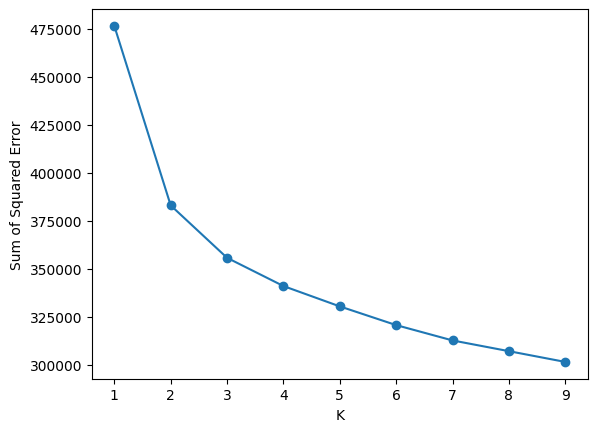

In [381]:
from sklearn.cluster import KMeans

sse= []
k_rng= range(1, 10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng, sse, marker='o')

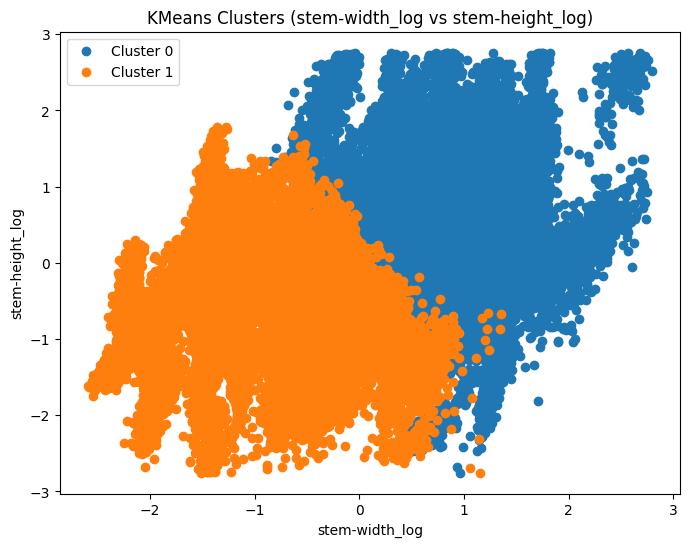

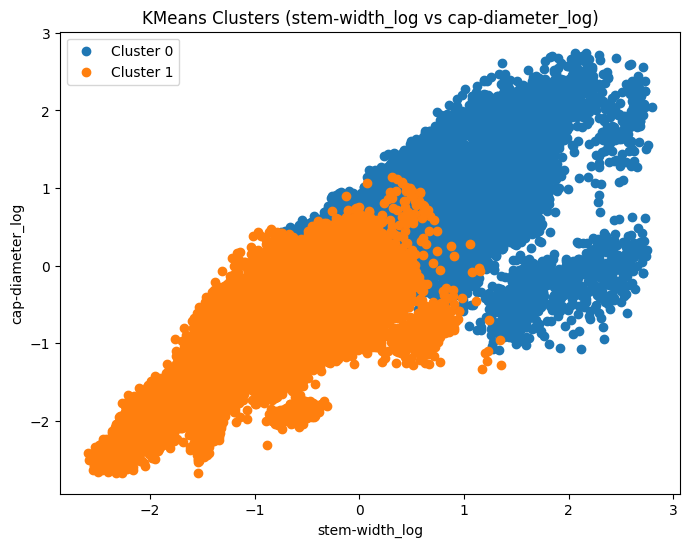

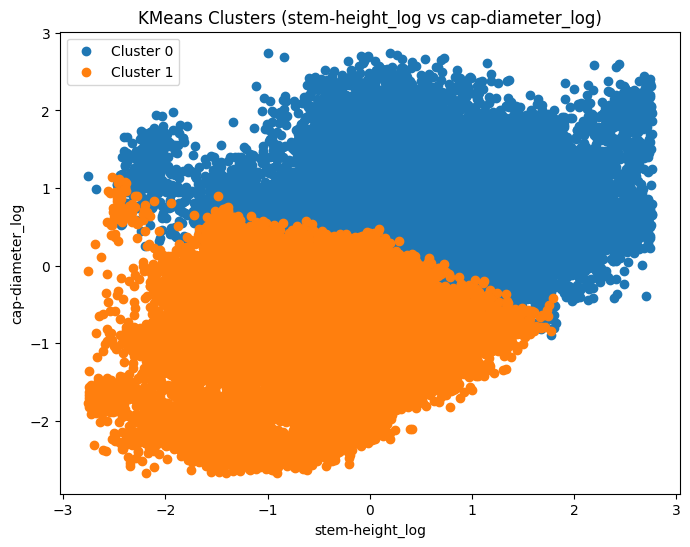

In [382]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools

log_features = ['stem-width_log', 'stem-height_log', 'cap-diameter_log']

n_clusters = 2

# Fit KMeans and assign cluster labels
y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(df[log_features])
df['Group_cluster'] = y_pred

# Visualize clusters for all pairs of selected log features
if len(log_features) >= 2:
    pairs = list(itertools.combinations(log_features, 2))
    for x_col, y_col in pairs:
        plt.figure(figsize=(8, 6))
        for i in range(n_clusters):
            plt.scatter(df[df.Group_cluster == i][x_col], df[df.Group_cluster == i][y_col], label=f'Cluster {i}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'KMeans Clusters ({x_col} vs {y_col})')
        plt.legend()
        plt.show()
else:
    print('Not enough log-transformed columns to plot clusters.')

In [379]:
from sklearn.cluster import KMeans

sse= []
k_rng= range(1, 10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng, sse, marker='o')

ValueError: could not convert string to float: 'p'

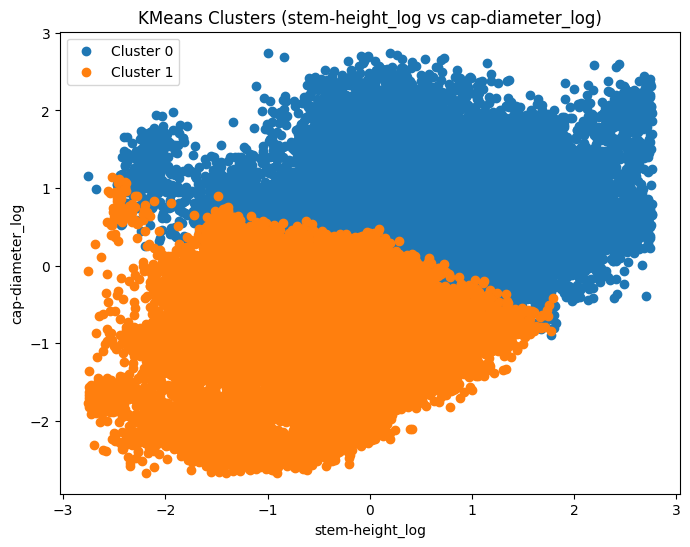

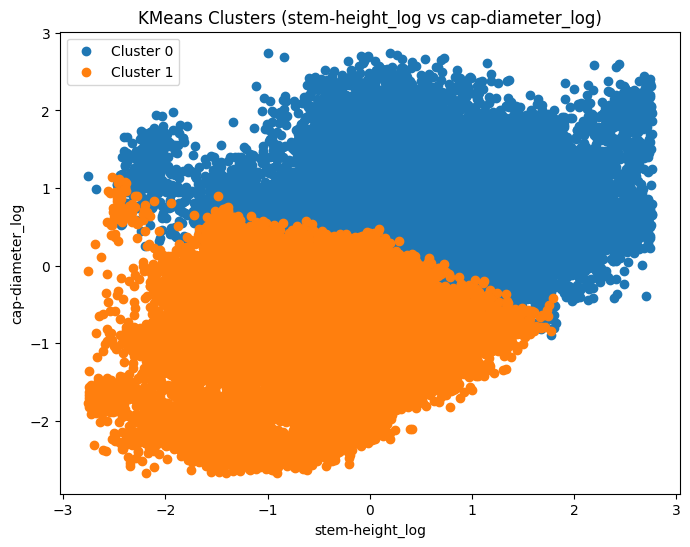

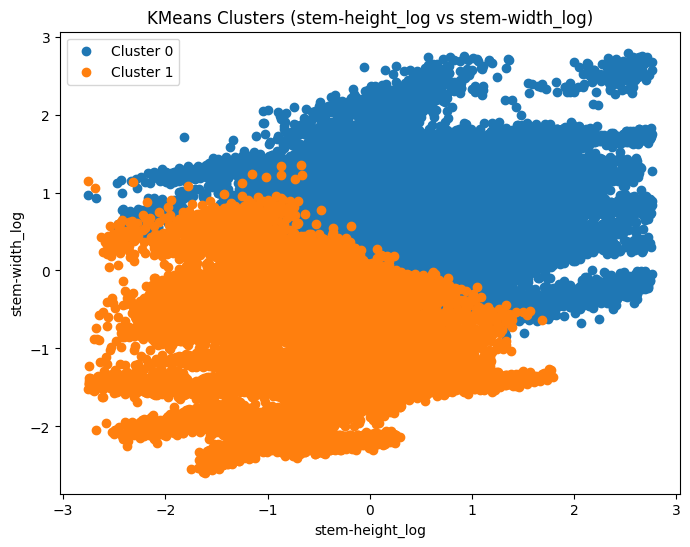

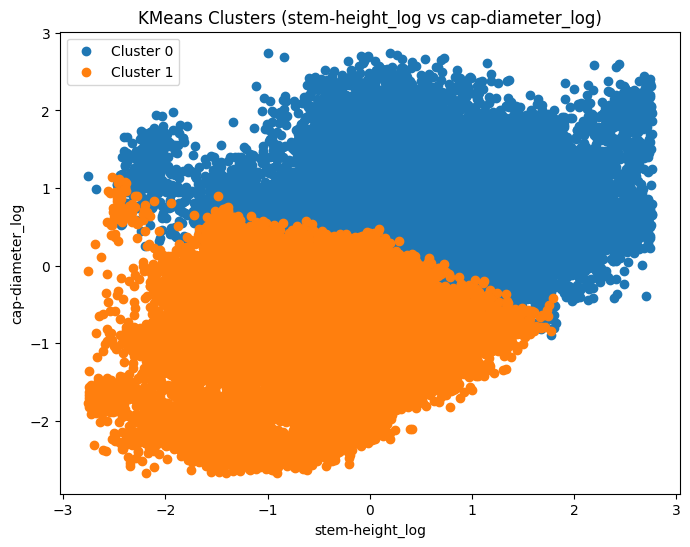

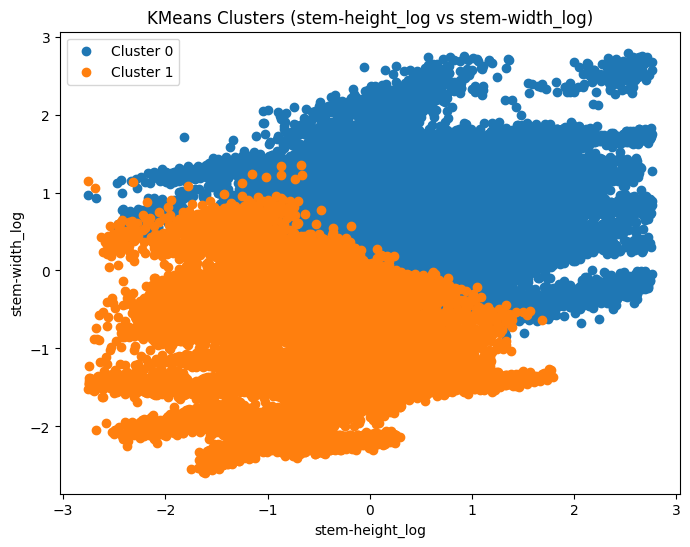

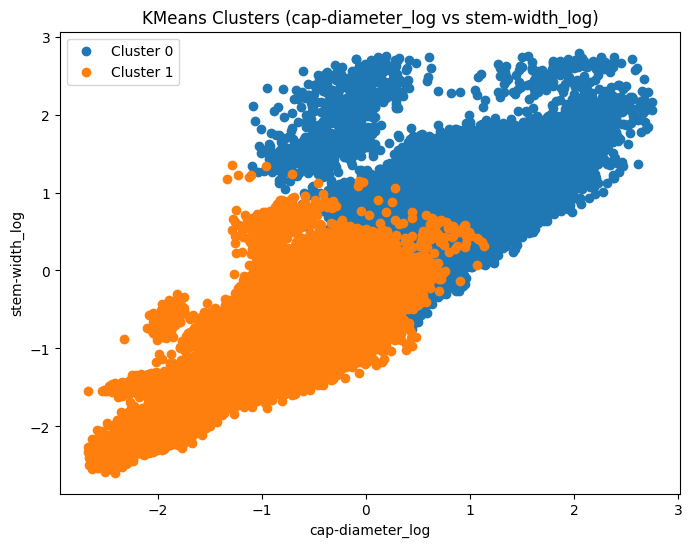

In [ ]:
# --- KMeans clustering and visualization for all pairs of numerical features ---
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools

# Select numeric columns for clustering (excluding 'Group_cluster' if present)
numeric_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col != 'Group_cluster']

# Set the number of clusters (change as needed)
n_clusters = 2

# Fit KMeans and assign cluster labels
y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(df[numeric_cols])
df['Group_cluster'] = y_pred

# Visualize clusters for all pairs of numeric columns
if len(numeric_cols) >= 2:
    pairs = list(itertools.combinations(numeric_cols, 2))
    for x_col, y_col in pairs:
        plt.figure(figsize=(8, 6))
        for i in range(n_clusters):
            plt.scatter(df[df.Group_cluster == i][x_col], df[df.Group_cluster == i][y_col], label=f'Cluster {i}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'KMeans Clusters ({x_col} vs {y_col})')
        plt.legend()
        plt.show()
else:
    print('Not enough numeric columns to plot clusters.')

# Mushroom Dataset ML Project: Approach, Insights, and Learning
---
## Dataset Overview
This notebook analyzes a mushroom dataset containing various features (shape, color, habitat, season, etc.) and a target class (edible/poisonous). The goal is to build robust machine learning models to predict mushroom edibility and extract insights from the data.

## Workflow & Reasoning
### 1. **Exploratory Data Analysis (EDA)**
- **Purpose:** Understand data structure, feature types, missing values, and distributions.
- **Approach:**
    - Used `df.info()`, `df.describe()`, and visualizations (histograms, boxplots, countplots) to summarize numerical and categorical features.
    - Identified high variance, skewness, and outliers in numerical features.
    - Detected redundant columns and data imbalance.

### 2. **Data Cleaning & Preprocessing**
- **Purpose:** Prepare data for ML algorithms by handling missing values, outliers, and encoding.
- **Approach:**
    - Dropped columns with >40% missing values to reduce noise.
    - Imputed categorical missing values with the mode (most frequent value) for minimal bias.
    - Applied log transformation to highly skewed/high variance numerical features for normalization.
    - Removed outliers using the IQR method to improve model reliability.
    - Grouped rare categories in categorical features to "Other" for better generalization.

### 3. **Feature Engineering & Encoding**
- **Purpose:** Convert categorical features to numeric for ML compatibility.
- **Approach:**
    - Used `OneHotEncoder` for categorical features, creating binary columns.
    - Applied `LabelEncoder` to the target class for supervised learning.
    - Scaled numerical features using `StandardScaler` for uniformity.

### 4. **Model Training & Evaluation (Supervised Learning)**
- **Purpose:** Build and compare multiple classifiers to predict mushroom class.
- **Approach:**
    - Split data into train/test sets for unbiased evaluation.
    - Trained models: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, GaussianNB, BernoulliNB, XGBoost, and Neural Network (TensorFlow/Keras).
    - Evaluated using accuracy, confusion matrix, classification report, ROC curve, and AUC.
    - Visualized model performance with bar charts and heatmaps.
- **Reasoning:** Multiple models allow comparison and selection of the best approach for the dataset. ROC/AUC and confusion matrices provide deeper insight into model strengths and weaknesses.

### 5. **Neural Network & Tuning**
- **Purpose:** Explore deep learning for classification and optimize performance.
- **Approach:**
    - Built feedforward neural networks with dropout for regularization.
    - Used callbacks (EarlyStopping, ReduceLROnPlateau) to prevent overfitting and tune learning rate.
    - Compared tuned and untuned models using accuracy and training history plots.
- **Reasoning:** Neural networks can capture complex patterns; tuning improves generalization and prevents overfitting.

### 6. **Unsupervised Learning (Clustering)**
- **Purpose:** Discover natural groupings in the data without labels.
- **Approach:**
    - Applied KMeans clustering to numeric features after encoding.
    - Used the elbow method (SSE plot) to select optimal cluster count.
    - Visualized clusters using scatterplots for interpretation.
- **Reasoning:** Clustering helps understand data structure, potential subgroups, and can inform further analysis.

## Key Insights & Learnings
- **Data Quality:** Handling missing values, outliers, and rare categories is crucial for reliable ML results.
- **Feature Engineering:** Proper encoding and scaling significantly impact model performance.
- **Model Comparison:** Ensemble methods (Random Forest, XGBoost) and neural networks often outperform simpler models, but all should be evaluated.
- **Evaluation Metrics:** Accuracy, confusion matrix, and ROC/AUC provide complementary views of model effectiveness.
- **Clustering:** Unsupervised methods reveal hidden patterns and can supplement supervised learning.

## Purpose & Takeaways
- **Purpose:** Demonstrate a complete ML workflow from raw data to advanced modeling and interpretation.
- **Learning:**
    - Importance of thorough EDA and preprocessing.
    - How to select and tune models for best results.
    - Value of visualizations for understanding and communicating findings.
    - Integration of supervised and unsupervised learning for holistic analysis.

---
**This notebook serves as a practical guide for end-to-end machine learning on tabular data, emphasizing robust preprocessing, model selection, evaluation, and interpretation.**

In [ ]:
# One-hot encode categorical features and drop unnecessary columns
from sklearn.preprocessing import OneHotEncoder

# Specify columns to drop (customize as needed)
columns_to_drop = ['Group_cluster'] if 'Group_cluster' in df.columns else []

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
df_encoded = df_encoded.drop(columns=columns_to_drop)

df = df_encoded  # Overwrite df with the encoded version

df.head()